+ In This File we have Done complete EDA Part
+ And Some of the Models they are listed as follows
    + 1). Exponential Smoothing Techniques(Holt-Winters Methods)
    + 2). ARIMA Model
    + 3). SARIMA Model

In [1]:
import shutup
shutup.please()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

In [4]:
# Extract Data from yfinance
import yfinance as yf
import datetime as dttm

startDate = dttm.datetime(2011, 1, 1)
endDate = dttm.datetime(2022, 7, 1)

GetData = yf.Ticker("NESTLEIND.NS")
# print(GetData.history(start=startDate, end=endDate))

yf_data = pd.DataFrame(GetData.history(start=startDate, end=endDate))
yf_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-01-03,3315.502203,3334.762854,3282.076883,3313.040771,5256,0.0,0
2011-01-04,3312.306385,3368.360717,3282.076731,3361.192139,21916,0.0,0
2011-01-05,3345.991030,3398.633773,3330.876202,3369.267822,32381,0.0,0
2011-01-06,3368.446961,3410.768474,3286.395048,3311.269775,16829,0.0,0
2011-01-07,3290.713555,3342.535815,3257.892789,3273.396240,30854,0.0,0


In [5]:
yf_data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-06-24,16950.050781,17250.000000,16922.050781,17231.650391,30380,0.0,0
2022-06-27,17350.000000,17407.199219,17182.699219,17358.250000,63842,0.0,0
2022-06-28,17300.000000,17499.849609,17051.000000,17403.900391,52224,0.0,0
2022-06-29,17350.000000,17525.000000,17252.300781,17499.050781,96972,0.0,0
2022-06-30,17499.050781,17568.800781,17234.199219,17470.000000,102842,0.0,0


In [6]:
# Extract data from csv-file
data = pd.read_excel('NESTLEIND_2011_2022.xlsx',index_col='Date',parse_dates=True)
data.head()

,series,open,high,low,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
2011-01-03,EQ,3838.7,3861.00,3800.0,3813.75,3831.0,3835.85,3838.83,4224.0,2295.0,5256,2.017690e+07,NaN
2011-01-04,EQ,3835.0,3899.90,3800.0,3835.85,3876.1,3891.60,3868.94,4224.0,2295.0,21916,8.479179e+07,NaN
2011-01-05,EQ,3874.0,3934.95,3856.5,3891.60,3899.9,3900.95,3907.04,4224.0,2295.0,32381,1.265139e+08,NaN
2011-01-06,EQ,3900.0,3949.00,3805.0,3900.95,3815.0,3833.80,3877.68,4224.0,2295.0,16829,6.525753e+07,NaN
2011-01-07,EQ,3810.0,3870.00,3772.0,3833.80,3795.0,3789.95,3810.33,4224.0,2295.0,30854,1.175640e+08,NaN


In [7]:
data.tail()

,series,open,high,low,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
2022-06-24,EQ,16950.05,17250.00,16922.05,16976.30,17222.90,17231.65,17167.45,20609.15,16000.0,30380,5.215471e+08,8569.0
2022-06-27,EQ,17350.00,17407.20,17182.70,17231.65,17400.00,17358.25,17320.46,20609.15,16000.0,63842,1.105773e+09,14421.0
2022-06-28,EQ,17300.00,17499.85,17051.00,17358.25,17395.00,17403.90,17295.16,20609.15,16000.0,52224,9.032226e+08,14265.0
2022-06-29,EQ,17350.00,17525.00,17252.30,17403.90,17519.95,17499.05,17454.49,20609.15,16000.0,96972,1.692597e+09,21788.0
2022-06-30,EQ,17499.05,17568.80,17234.20,17499.05,17301.05,17470.00,17446.47,20609.15,16000.0,102842,1.794230e+09,31468.0


In [8]:
usecols=['open','high','low','close','52W H','52W L','VOLUME']
data1 = data[usecols]
data1.head()

,open,high,low,close,52W H,52W L,VOLUME
Date,,,,,,,
2011-01-03,3838.7,3861.00,3800.0,3835.85,4224.0,2295.0,5256
2011-01-04,3835.0,3899.90,3800.0,3891.60,4224.0,2295.0,21916
2011-01-05,3874.0,3934.95,3856.5,3900.95,4224.0,2295.0,32381
2011-01-06,3900.0,3949.00,3805.0,3833.80,4224.0,2295.0,16829
2011-01-07,3810.0,3870.00,3772.0,3789.95,4224.0,2295.0,30854


# EDA

In [9]:
import plotly.io as pio
# For interactive graph Uncomment " pio.renderers.default = 'notebook' " and and comment " pio.renderers.default = 'png' "
# And then rerun the file on Jupyter Notebook


# pio.renderers.default = 'notebook'
pio.renderers.default = 'png'

In [10]:
data1.shape

(2849, 7)

In [11]:
yf_data.shape

(2834, 7)

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2849 entries, 2011-01-03 to 2022-06-30
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2849 non-null   float64
 1   high    2849 non-null   float64
 2   low     2849 non-null   float64
 3   close   2849 non-null   float64
 4   52W H   2849 non-null   float64
 5   52W L   2849 non-null   float64
 6   VOLUME  2849 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 178.1 KB


In [13]:
data1.isnull().sum()

open      0
high      0
low       0
close     0
52W H     0
52W L     0
VOLUME    0
dtype: int64

In [14]:
data1.describe()

,open,high,low,close,52W H,52W L,VOLUME
count,2849.000000,2849.000000,2849.000000,2849.000000,2849.000000,2849.000000,2.849000e+03
mean,9008.470849,9106.849035,8901.656880,9002.212706,9902.535556,6943.155809,5.774089e+04
std,5024.292768,5073.447018,4965.719144,5020.730880,5378.411822,3917.367683,6.730024e+04
min,3200.000000,3240.000000,3162.250000,3200.850000,4224.000000,2295.000000,3.050000e+02
25%,4988.950000,5041.000000,4935.200000,4997.950000,5844.000000,4433.000000,2.002200e+04
50%,6601.700000,6666.600000,6532.000000,6605.200000,7430.000000,5280.050000,3.906700e+04
75%,12090.000000,12259.900000,11916.700000,12036.550000,12268.500000,9047.050000,7.108100e+04
max,20450.000000,20609.150000,20230.000000,20457.200000,20609.150000,16450.000000,1.106746e+06


In [15]:
# Using plotly.express
import plotly
import plotly.express as px

px.defaults.template = "ggplot2"

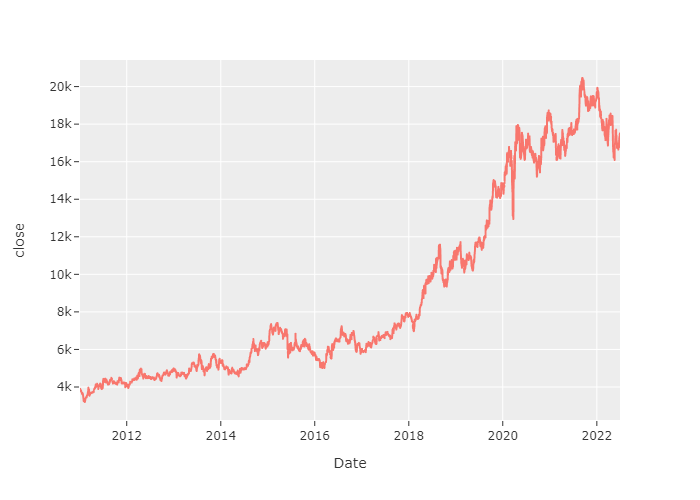

In [16]:
# Let's see a historical view of the closing price
fig = px.line(data1, y="close")
fig.show()

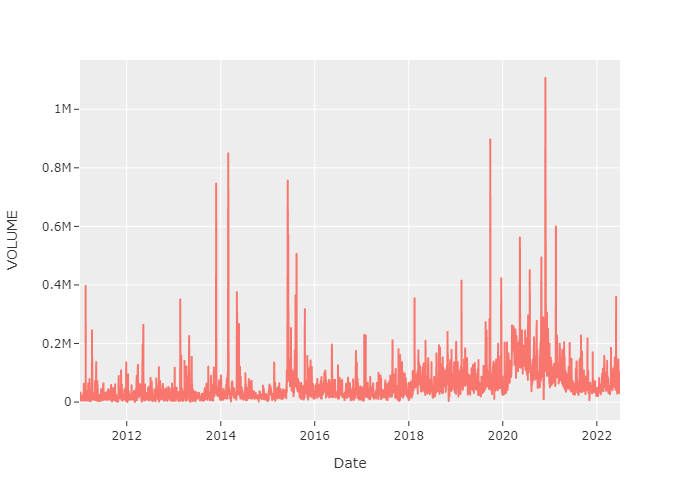

In [17]:
# Now let's plot the total volume of stock being traded each day
fig = px.line(data1, y="VOLUME")
fig.show()

In [18]:
data2 = data1.copy()

data2['Daily_Return'] = data2['close'].pct_change()
data2 = data2.dropna()
data2.head()

,open,high,low,close,52W H,52W L,VOLUME,Daily_Return
Date,,,,,,,,
2011-01-04,3835.0,3899.90,3800.0,3891.60,4224.0,2295.0,21916,0.014534
2011-01-05,3874.0,3934.95,3856.5,3900.95,4224.0,2295.0,32381,0.002403
2011-01-06,3900.0,3949.00,3805.0,3833.80,4224.0,2295.0,16829,-0.017214
2011-01-07,3810.0,3870.00,3772.0,3789.95,4224.0,2295.0,30854,-0.011438
2011-01-10,3789.0,3819.90,3771.0,3789.50,4224.0,2295.0,8894,-0.000119


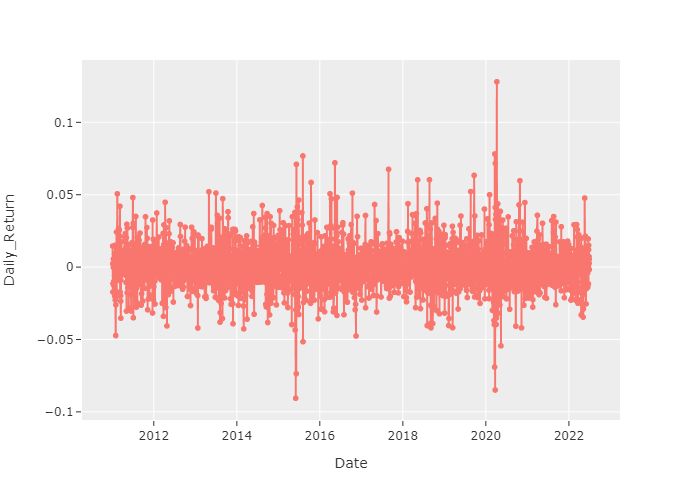

In [19]:
# use pct_change to find the percent change for each day
fig = px.line(data2, y='Daily_Return',markers=True)
fig.show()

In [20]:
# plot2 = px.bar(data2, x=data2.index, y="Daily_Return")
# plot2.show()

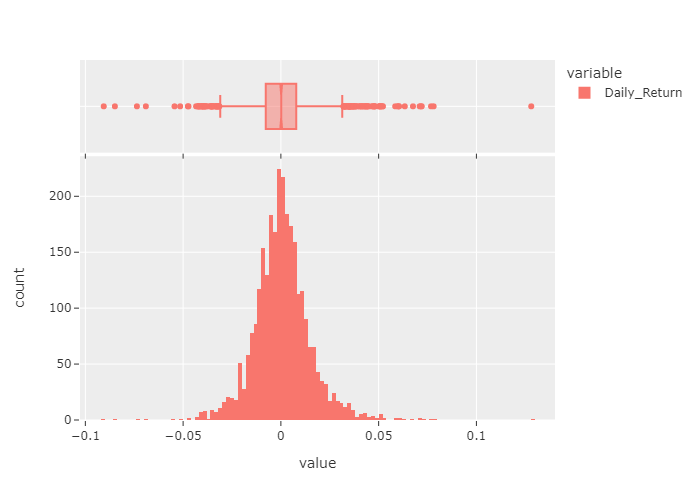

In [21]:
# Distribution of Daily Return
fig = px.histogram(data2['Daily_Return'],marginal="box")
fig.show()

In [22]:
# Let's go ahead and plot out several moving averages
data2 = data1.copy()

ma_day = [10,30,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data2[column_name]=pd.DataFrame.rolling(data2['close'],ma).mean()

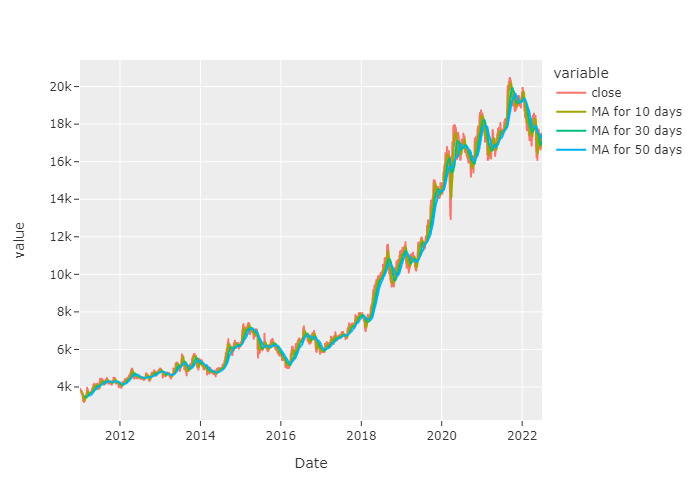

In [23]:
fig = px.line(data2, y=['close','MA for 10 days','MA for 30 days','MA for 50 days'])
# data2[['close','MA for 10 days','MA for 30 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))
# plt.show()
fig.show()

In [24]:
# Let's plot out Seasonal Plots for our dataset
data3 = data1.copy()
# data3.index.freq = 'd'

data3['year'] = list(pd.Series(data3.index).dt.year)
data3['month'] = list(pd.Series(data3.index).dt.month)
data3.head()

,open,high,low,close,52W H,52W L,VOLUME,year,month
Date,,,,,,,,,
2011-01-03,3838.7,3861.00,3800.0,3835.85,4224.0,2295.0,5256,2011,1
2011-01-04,3835.0,3899.90,3800.0,3891.60,4224.0,2295.0,21916,2011,1
2011-01-05,3874.0,3934.95,3856.5,3900.95,4224.0,2295.0,32381,2011,1
2011-01-06,3900.0,3949.00,3805.0,3833.80,4224.0,2295.0,16829,2011,1
2011-01-07,3810.0,3870.00,3772.0,3789.95,4224.0,2295.0,30854,2011,1


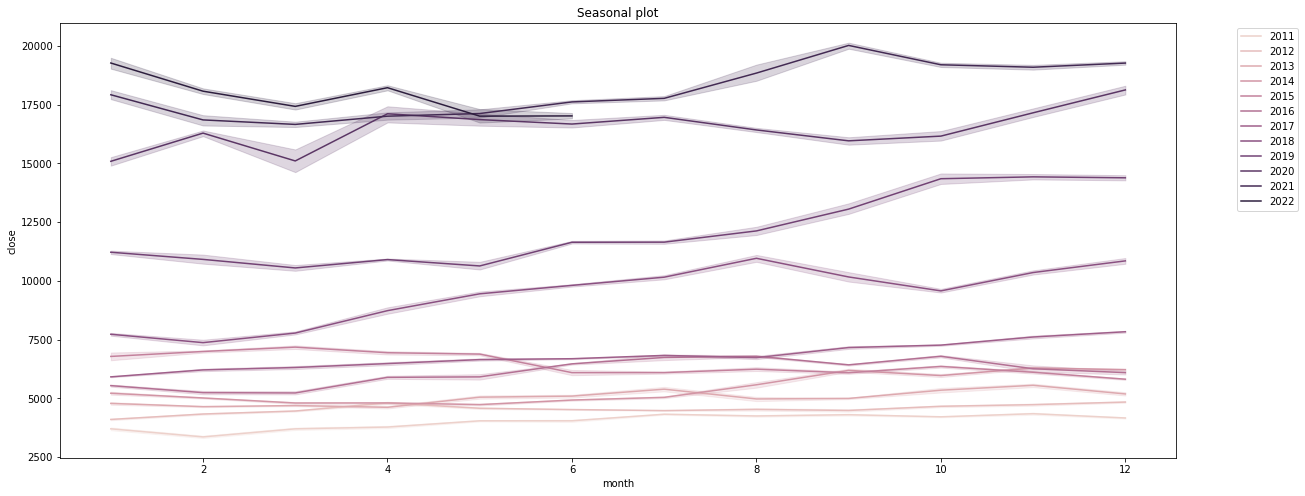

In [25]:
plt.figure(figsize = (20,8))
sns.lineplot(data=data3, x='month', y='close', hue='year', legend='full')


# add title
plt.title('Seasonal plot')

# move the legend outside of the main figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

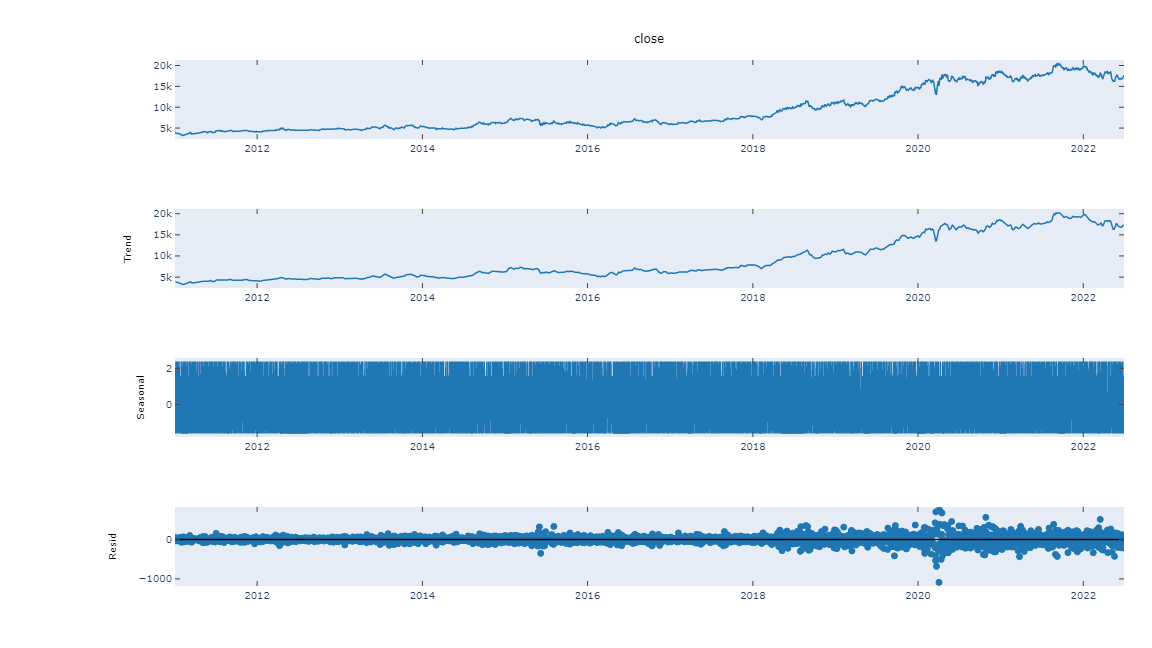

In [26]:
# Seasonal Decompose plot to se trand and seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.offline as py

decomposition = seasonal_decompose(data3['close'], model='add',period = 5)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = decomposition.plot()
fig.set_size_inches((16, 9))
py.iplot_mpl(fig)

In [27]:
# To check the stationarity of Time series dataset

def stationarity_check(TimeSeries):
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller

    # Calculate rolling statistics
    rolmean = TimeSeries.rolling(window = 8, center = False).mean()
    rolstd = TimeSeries.rolling(window = 8, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TimeSeries) # change the passengers column as required 
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    if dfoutput[1] <= 0.05:
        print("\nReject the null hypothesis")
        print("Data is stationary")
    else:
        print("\nFail to reject the null hypothesis")
        print("Data is non-stationary")
    
    return None

In [28]:
residual.dropna(inplace=True)

stationarity_check(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.678376e+01
p-value                        1.258075e-29
#Lags Used                     2.800000e+01
Number of Observations Used    2.816000e+03
Critical Value (1%)           -3.432674e+00
Critical Value (5%)           -2.862567e+00
Critical Value (10%)          -2.567317e+00
dtype: float64

Reject the null hypothesis
Data is stationary


In [29]:
decomposition = seasonal_decompose(data3['close'], model='add',period = 20)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

residual.dropna(inplace=True)

stationarity_check(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.647364e+01
p-value                        2.270925e-29
#Lags Used                     2.800000e+01
Number of Observations Used    2.800000e+03
Critical Value (1%)           -3.432688e+00
Critical Value (5%)           -2.862573e+00
Critical Value (10%)          -2.567320e+00
dtype: float64

Reject the null hypothesis
Data is stationary


In [30]:
decomposition = seasonal_decompose(data3['close'], model='mul',period = 5)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

residual.dropna(inplace=True)

stationarity_check(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.691489e+01
p-value                        1.004170e-29
#Lags Used                     2.800000e+01
Number of Observations Used    2.816000e+03
Critical Value (1%)           -3.432674e+00
Critical Value (5%)           -2.862567e+00
Critical Value (10%)          -2.567317e+00
dtype: float64

Reject the null hypothesis
Data is stationary


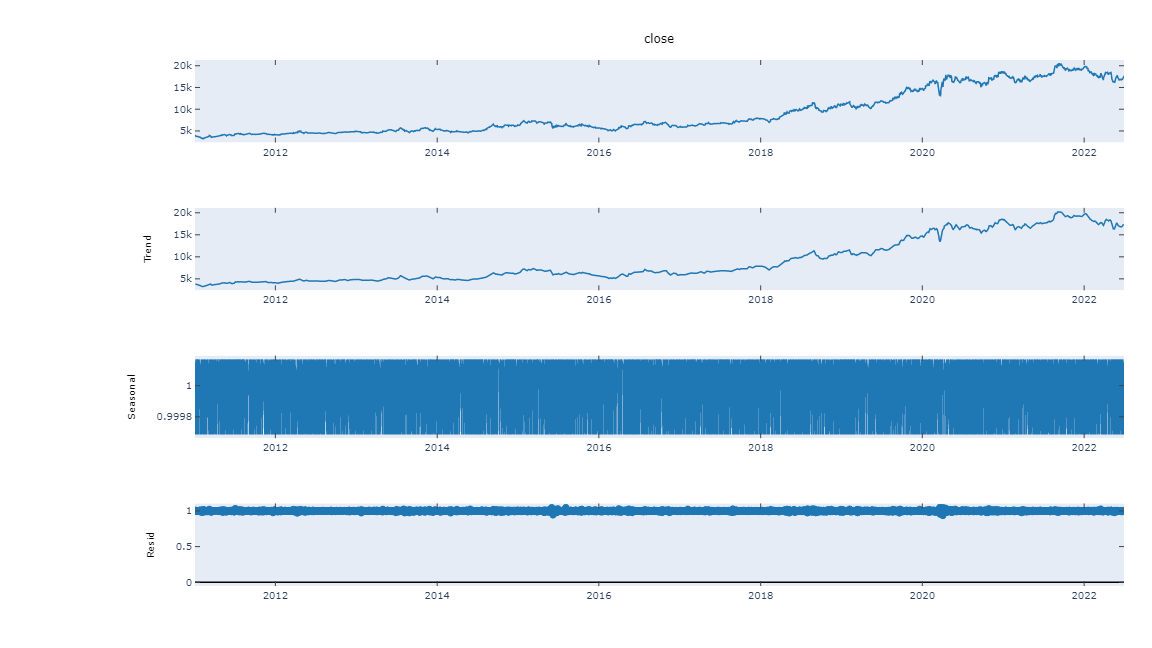

In [31]:
fig = decomposition.plot()
fig.set_size_inches((16, 9))
py.iplot_mpl(fig)

+ As we can see that the p-value of "Multiplictive Model" with "Period = 5" is low so we use as our period for our model.

# Model Building

In [32]:
final_data = pd.DataFrame(data1.close)
final_data.head()

,close
Date,
2011-01-03,3835.85
2011-01-04,3891.60
2011-01-05,3900.95
2011-01-06,3833.80
2011-01-07,3789.95


In [33]:
final_data['2020-01-01':'2022-06-30'].count()

close    623
dtype: int64

In [34]:
train_data = final_data.iloc[:len(final_data)-623] 
test_data = final_data.iloc[len(final_data)-623:]
train_data.shape, test_data.shape

((2226, 1), (623, 1))

In [35]:
test_data, train_data

(               close
 Date                
 2020-01-01  14779.05
 2020-01-02  14729.35
 2020-01-03  14593.60
 2020-01-06  14416.65
 2020-01-07  14290.75
 ...              ...
 2022-06-24  17231.65
 2022-06-27  17358.25
 2022-06-28  17403.90
 2022-06-29  17499.05
 2022-06-30  17470.00
 
 [623 rows x 1 columns],
                close
 Date                
 2011-01-03   3835.85
 2011-01-04   3891.60
 2011-01-05   3900.95
 2011-01-06   3833.80
 2011-01-07   3789.95
 ...              ...
 2019-12-24  14586.00
 2019-12-26  14599.25
 2019-12-27  14664.15
 2019-12-30  14851.90
 2019-12-31  14785.35
 
 [2226 rows x 1 columns])

## Holt-Winters Methods(i.e. Exponential Smoothing Techniques)

### Double Exponential Smoothing

In [36]:
data4 = final_data.copy()
data4.head()

,close
Date,
2011-01-03,3835.85
2011-01-04,3891.60
2011-01-05,3900.95
2011-01-06,3833.80
2011-01-07,3789.95


In [37]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

mod_add = ExponentialSmoothing(data4.close, trend='add')
fitted_model= mod_add.fit()
data4['DESadd'] = fitted_model.fittedvalues.shift(-1)

data4['DESmul'] = ExponentialSmoothing(data4.close, trend='mul').fit().fittedvalues.shift(-1)

data4

,close,DESadd,DESmul
Date,,,
2011-01-03,3835.85,3894.659426,3830.324519
2011-01-04,3891.60,3946.356249,3883.163544
2011-01-05,3900.95,3957.966393,3896.107625
2011-01-06,3833.80,3894.192445,3833.718925
2011-01-07,3789.95,3846.661850,3787.654387
...,...,...,...
2022-06-24,17231.65,17203.752081,17206.088699
2022-06-27,17358.25,17343.312978,17345.383501
2022-06-28,17403.90,17397.335807,17399.211659


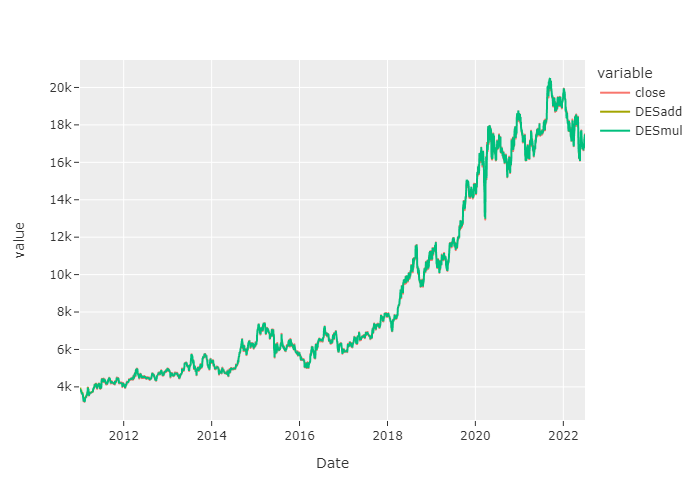

In [38]:
fig = px.line(data4, y=['close','DESadd', 'DESmul'])
fig.show()

In [39]:
from sklearn.metrics import mean_squared_error

def error(data1, data2):
    mse = mean_squared_error(data1, data2)
    rmse = np.sqrt(mse)
    
    print('Errors :-')
    print('MSE : ',mse)
    print('RMSE : ',rmse,'\n')
    return mse, rmse

In [40]:
error(data4['close'][:-1], data4['DESadd'][:-1])
error(data4['close'][:-1], data4['DESmul'][:-1])

Errors :-
MSE :  307.7843206503579
RMSE :  17.543782962929 

Errors :-
MSE :  320.4405679362184
RMSE :  17.900853832603023 



(320.4405679362184, 17.900853832603023)

### Triple Exponential Smoothing

In [41]:
data4['TESadd'] = ExponentialSmoothing(data4['close'],trend='add',seasonal='add',seasonal_periods=5,damped_trend=True).fit().fittedvalues
data4['TESmul'] = ExponentialSmoothing(data4['close'],trend='mul',seasonal='mul',seasonal_periods=5,damped_trend=True).fit().fittedvalues
data4['TESaddmul'] = ExponentialSmoothing(data4['close'],trend='add',seasonal='mul',seasonal_periods=5,damped_trend=True).fit().fittedvalues
data4['TESmuladd'] = ExponentialSmoothing(data4['close'],trend='mul',seasonal='add',seasonal_periods=5,damped_trend=True).fit().fittedvalues

data4

,close,DESadd,DESmul,TESadd,TESmul,TESaddmul,TESmuladd
Date,,,,,,,
2011-01-03,3835.85,3894.659426,3830.324519,3852.966169,3821.806584,3838.637347,3968.617809
2011-01-04,3891.60,3946.356249,3883.163544,3836.380851,3876.421167,3825.537702,4024.141903
2011-01-05,3900.95,3957.966393,3896.107625,3883.508140,3885.806747,3868.488847,4027.886884
2011-01-06,3833.80,3894.192445,3833.718925,3898.026523,3819.061383,3883.685998,3955.151158
2011-01-07,3789.95,3846.661850,3787.654387,3837.214648,3775.526355,3825.966057,3905.952464
...,...,...,...,...,...,...,...
2022-06-24,17231.65,17203.752081,17206.088699,16967.608237,16973.482312,16970.400014,16967.994698
2022-06-27,17358.25,17343.312978,17345.383501,17204.836444,17204.365896,17202.118230,17211.110790
2022-06-28,17403.90,17397.335807,17399.211659,17337.847520,17333.734097,17337.840172,17347.749912


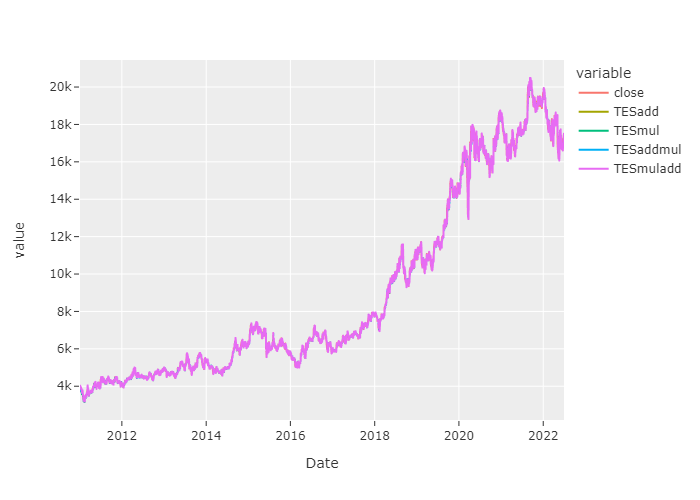

In [42]:
fig = px.line(data4, y=['close','TESadd', 'TESmul', 'TESaddmul', 'TESmuladd'])
fig.show()

In [43]:
data4.head()

,close,DESadd,DESmul,TESadd,TESmul,TESaddmul,TESmuladd
Date,,,,,,,
2011-01-03,3835.85,3894.659426,3830.324519,3852.966169,3821.806584,3838.637347,3968.617809
2011-01-04,3891.60,3946.356249,3883.163544,3836.380851,3876.421167,3825.537702,4024.141903
2011-01-05,3900.95,3957.966393,3896.107625,3883.508140,3885.806747,3868.488847,4027.886884
2011-01-06,3833.80,3894.192445,3833.718925,3898.026523,3819.061383,3883.685998,3955.151158
2011-01-07,3789.95,3846.661850,3787.654387,3837.214648,3775.526355,3825.966057,3905.952464


In [44]:
error(data4['close'], data4['TESadd'])
error(data4['close'], data4['TESmul'])
error(data4['close'], data4['TESaddmul'])
error(data4['close'], data4['TESmuladd'])

Errors :-
MSE :  24331.941774393683
RMSE :  155.98699232433992 

Errors :-
MSE :  24437.482778880272
RMSE :  156.3249269274746 

Errors :-
MSE :  24255.024706669312
RMSE :  155.74024754914612 

Errors :-
MSE :  24942.108506236036
RMSE :  157.93070792672347 



(24942.108506236036, 157.93070792672347)

+ As we can see from above errors that the Triple Exponential Model perform well with "Additive Trend" and "Multiplicative Seasonality"

In [45]:
# "Additive Trend" and "Multiplicative Seasonality"
exp_model = ExponentialSmoothing(train_data['close'], trend='mul',seasonal='mul',seasonal_periods=253,damped_trend=True)
fitted_model = exp_model.fit()
test_predictions = fitted_model.forecast(623)
test_predictions.index = test_data.index

In [46]:
test_predictions

Date
2020-01-01    14833.954206
2020-01-02    14813.352685
2020-01-03    14723.267082
2020-01-06    14747.899482
2020-01-07    14761.116089
                  ...     
2022-06-24    12983.446033
2022-06-27    13050.349958
2022-06-28    13105.182787
2022-06-29    13144.235732
2022-06-30    13096.428825
Length: 623, dtype: float64

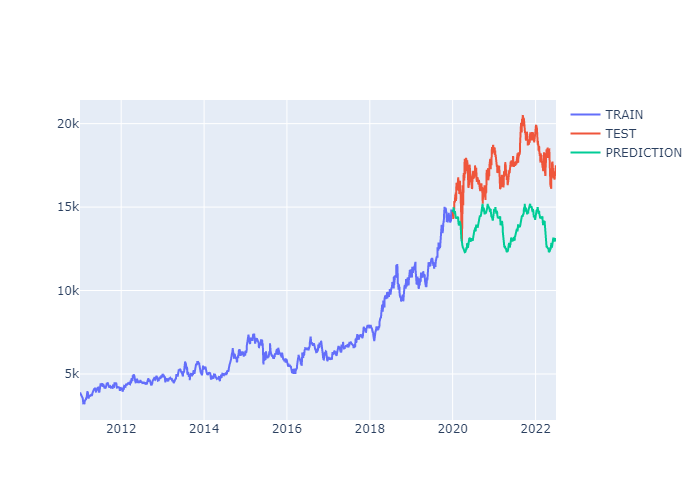

In [47]:
import plotly.graph_objects as go

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=train_data.index, y=train_data['close'], mode='lines', name='TRAIN'))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['close'], mode='lines', name='TEST'))
fig.add_trace(go.Scatter(x=test_predictions.index, y=test_predictions, mode='lines', name='PREDICTION'))

fig.show()

In [48]:
error(test_data['close'],test_predictions)

Errors :-
MSE :  14268258.020988641
RMSE :  3777.334777457333 



(14268258.020988641, 3777.334777457333)

In [49]:
# "Additive Trend" and "Additive Seasonality"
exp_model = ExponentialSmoothing(train_data['close'], trend='add',seasonal='add',seasonal_periods=253)
fitted_model = exp_model.fit()
test_predictions = fitted_model.forecast(623)
error(test_data['close'],test_predictions)

Errors :-
MSE :  5669084.5060069095
RMSE :  2380.983936528533 



(5669084.5060069095, 2380.983936528533)

In [50]:
# "Multiplicative Trend" and "Additive Seasonality"
exp_model = ExponentialSmoothing(train_data['close'], trend='mul',seasonal='add',seasonal_periods=253)
fitted_model = exp_model.fit()
test_predictions = fitted_model.forecast(623)
error(test_data['close'],test_predictions)

Errors :-
MSE :  959103781.0366454
RMSE :  30969.40072130304 



(959103781.0366454, 30969.40072130304)

In [51]:
# "Multiplicative Trend" and "Multiplicative Seasonality"
exp_model = ExponentialSmoothing(train_data['close'], trend='mul',seasonal='mul',seasonal_periods=253)
fitted_model = exp_model.fit()
test_predictions = fitted_model.forecast(623)
test_predictions.index = test_data.index
expo_mse, expo_rmse = error(test_data['close'],test_predictions)

Errors :-
MSE :  3243185.3876411137
RMSE :  1800.8846125282746 



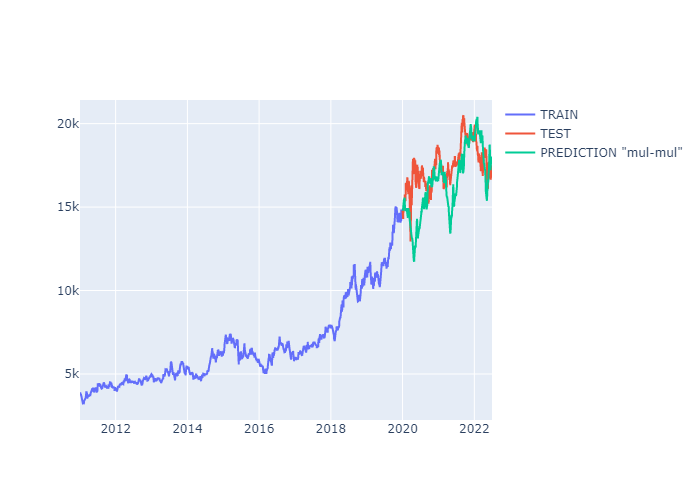

In [52]:
import plotly.graph_objects as go

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=train_data.index, y=train_data['close'], mode='lines', name='TRAIN'))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['close'], mode='lines', name='TEST'))
fig.add_trace(go.Scatter(x=test_predictions.index, y=test_predictions, mode='lines', name='PREDICTION "mul-mul"'))

fig.show()

+ From above Exponential model "Additive Trend" and "Multiplicative Seasonality" Model have less Error.

## ARIMA Model

In [53]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm

In [54]:
data5 = final_data.copy()
data5.head()

,close
Date,
2011-01-03,3835.85
2011-01-04,3891.60
2011-01-05,3900.95
2011-01-06,3833.80
2011-01-07,3789.95


### order of differencing (d) in ARIMA model

#### Do  differencing and do ADF-Test 

In [55]:
stationarity_check(data5['close'])

Results of Dickey-Fuller Test:
Test Statistic                    0.049250
p-value                           0.962420
#Lags Used                       26.000000
Number of Observations Used    2822.000000
Critical Value (1%)              -3.432669
Critical Value (5%)              -2.862565
Critical Value (10%)             -2.567315
dtype: float64

Fail to reject the null hypothesis
Data is non-stationary


In [56]:
from statsmodels.tsa.statespace.tools import diff
data5['diff1'] = diff(data5['close'],k_diff=1)
stationarity_check(data5['diff1'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.248645e+01
p-value                        3.011219e-23
#Lags Used                     2.500000e+01
Number of Observations Used    2.822000e+03
Critical Value (1%)           -3.432669e+00
Critical Value (5%)           -2.862565e+00
Critical Value (10%)          -2.567315e+00
dtype: float64

Reject the null hypothesis
Data is stationary


In [57]:
from statsmodels.tsa.statespace.tools import diff
data5['diff2'] = diff(data5['diff1'],k_diff=1)
stationarity_check(data5['diff2'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.673465e+01
p-value                        1.374013e-29
#Lags Used                     2.800000e+01
Number of Observations Used    2.818000e+03
Critical Value (1%)           -3.432673e+00
Critical Value (5%)           -2.862566e+00
Critical Value (10%)          -2.567316e+00
dtype: float64

Reject the null hypothesis
Data is stationary


In [58]:
from statsmodels.tsa.statespace.tools import diff
data5['seasonaldiff1_5'] = diff(data5['close'],k_diff=1, k_seasonal_diff=1, seasonal_periods=5)
stationarity_check(data5['seasonaldiff1_5'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.720142e+01
p-value                        6.455983e-30
#Lags Used                     2.600000e+01
Number of Observations Used    2.816000e+03
Critical Value (1%)           -3.432674e+00
Critical Value (5%)           -2.862567e+00
Critical Value (10%)          -2.567317e+00
dtype: float64

Reject the null hypothesis
Data is stationary


In [59]:
from statsmodels.tsa.statespace.tools import diff
data5['seasonaldiff1_20'] = diff(data5['close'],k_diff=1, k_seasonal_diff=1, seasonal_periods=20)
stationarity_check(data5['seasonaldiff1_20'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -20.029512
p-value                           0.000000
#Lags Used                       20.000000
Number of Observations Used    2807.000000
Critical Value (1%)              -3.432682
Critical Value (5%)              -2.862570
Critical Value (10%)             -2.567318
dtype: float64

Reject the null hypothesis
Data is stationary


### ACF Plot for Orignal data, 1st Differenced data, 2nd Differenced data

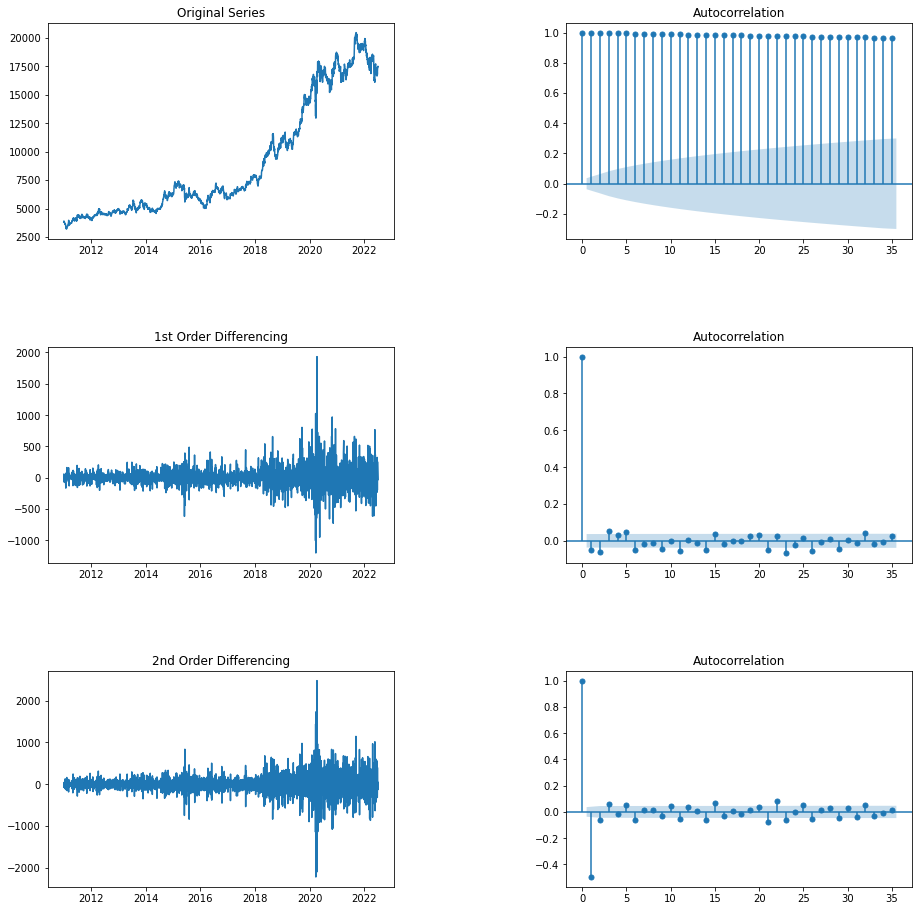

In [60]:
# Original Series
fig, axes = plt.subplots(3, 2,figsize=(15,15))

axes[0, 0].plot(data5.close); axes[0, 0].set_title('Original Series')
plot_acf(data5.close, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data5.close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data5.close.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data5.close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data5.close.diff().diff().dropna(), ax=axes[2, 1])

plt.subplots_adjust(left=0.1,bottom=0.2, right=0.9, top=1, wspace=0.5, hspace=0.5)
plt.show()

### PACF Plot for Orignal data, 1st Differenced data, 2nd Differenced data

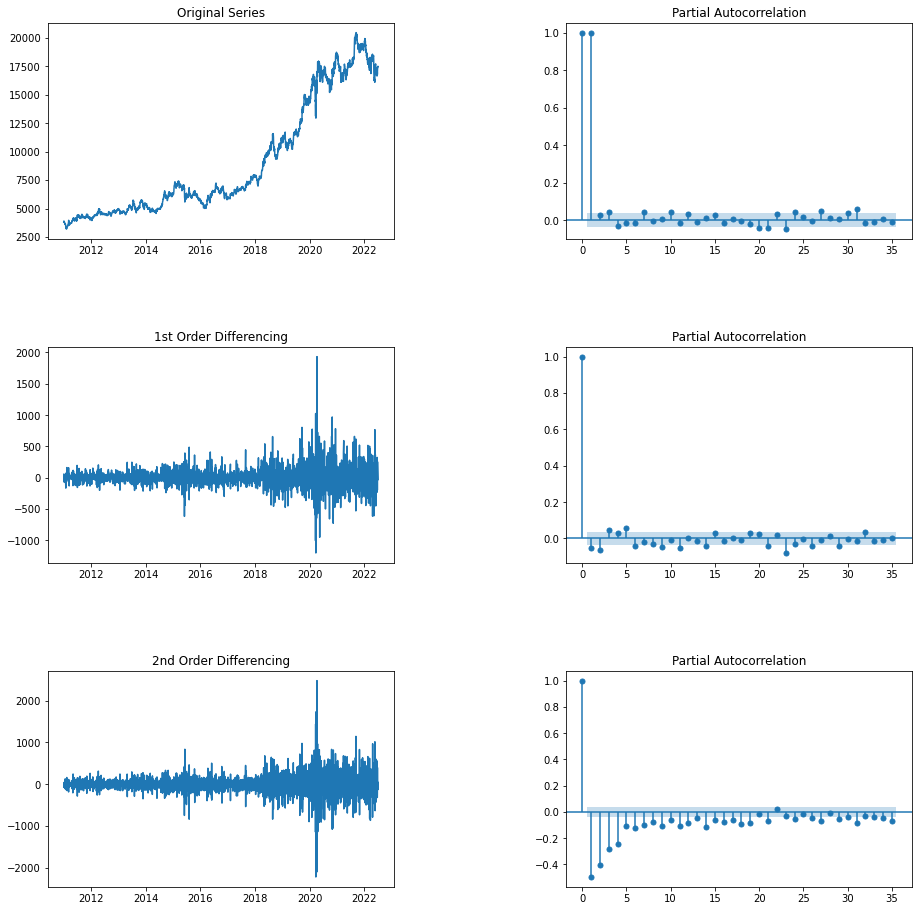

In [61]:
# Original Series
fig, axes = plt.subplots(3, 2,figsize=(15,15))

axes[0, 0].plot(data5.close); axes[0, 0].set_title('Original Series')
plot_pacf(data5.close, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data5.close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(data5.close.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data5.close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_pacf(data5.close.diff().diff().dropna(), ax=axes[2, 1])

plt.subplots_adjust(left=0.1,bottom=0.2, right=0.9, top=1, wspace=0.5, hspace=0.5)
plt.show()

In [62]:
# 1,1,1 ARIMA Model
model = ARIMA(train_data, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                 2225
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -13482.237
Method:                       css-mle   S.D. of innovations            103.595
Date:                Mon, 25 Jul 2022   AIC                          26972.474
Time:                        17:25:38   BIC                          26995.304
Sample:                             1   HQIC                         26980.811
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.9188      2.080      2.365      0.018       0.843       8.995
ar.L1.D.close     0.4190      0.483      0.868      0.385      -0.527       1.365
ma.L1.D.close    -0.4499      0.475     

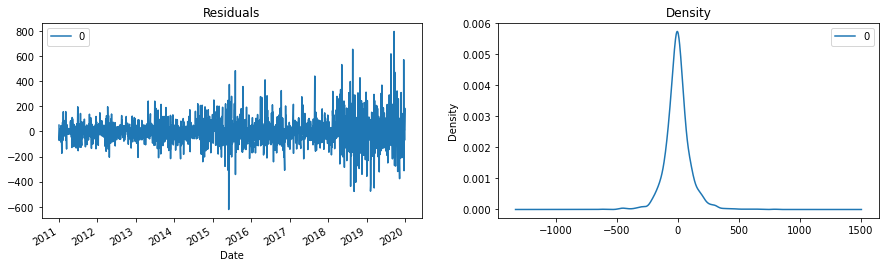

In [63]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(15,4))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [64]:
# 2,2,2 ARIMA Model
model = ARIMA(train_data, order=(2,2,2))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.close   No. Observations:                 2224
Model:                 ARIMA(2, 2, 2)   Log Likelihood              -13477.700
Method:                       css-mle   S.D. of innovations            103.485
Date:                Mon, 25 Jul 2022   AIC                          26967.401
Time:                        17:25:40   BIC                          27001.643
Sample:                             2   HQIC                         26979.906
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0065      0.003      1.976      0.048    5.19e-05       0.013
ar.L1.D2.close    -0.7645      0.165     -4.626      0.000      -1.088      -0.441
ar.L2.D2.close    -0.0458      0.021

In [65]:
# 0,1,1 ARIMA Model
model = ARIMA(train_data, order=(0,1,1))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                 2225
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -13482.422
Method:                       css-mle   S.D. of innovations            103.604
Date:                Mon, 25 Jul 2022   AIC                          26970.844
Time:                        17:25:40   BIC                          26987.967
Sample:                             1   HQIC                         26977.097
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.9211      2.127      2.314      0.021       0.753       9.089
ma.L1.D.close    -0.0318      0.021     -1.486      0.137      -0.074       0.010
                                    Root

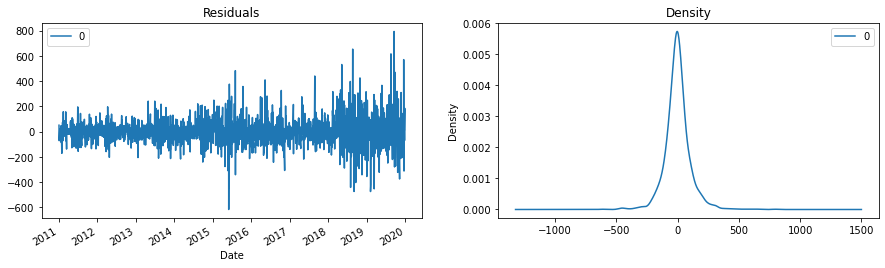

In [66]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(15,4))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [67]:
fc, se, conf = model_fit.forecast(623)
test_predictions = pd.Series(fc, index=test_data.index)
test_predictions

Date
2020-01-01    14792.358587
2020-01-02    14797.279711
2020-01-03    14802.200835
2020-01-06    14807.121960
2020-01-07    14812.043084
                  ...     
2022-06-24    17833.613421
2022-06-27    17838.534545
2022-06-28    17843.455669
2022-06-29    17848.376794
2022-06-30    17853.297918
Length: 623, dtype: float64

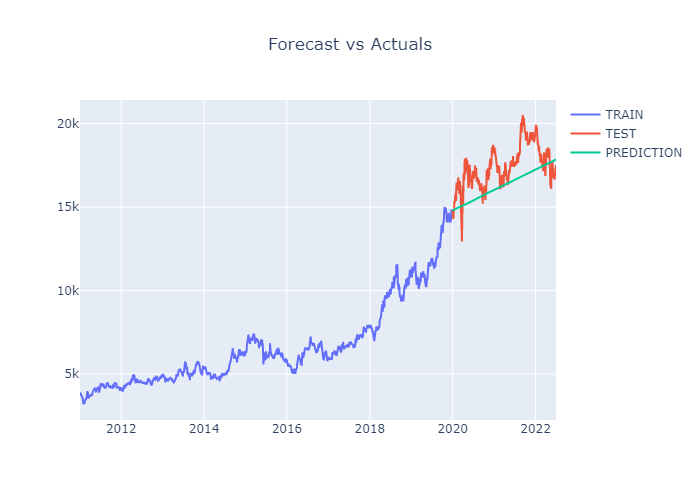

In [68]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=train_data.index, y=train_data['close'], mode='lines', name='TRAIN'))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['close'], mode='lines', name='TEST'))
fig.add_trace(go.Scatter(x=test_predictions.index, y=test_predictions, mode='lines', name='PREDICTION'))

fig.update_layout(title_text='Forecast vs Actuals', title_x=0.5)
fig.show()

In [69]:
arima_mse, arima_rmse = error(test_data,test_predictions)

Errors :-
MSE :  2198312.113229962
RMSE :  1482.6706017285032 



In [70]:
# ARIMA Model Using auto-ARIMA
smodel = pm.auto_arima(train_data, start_p=1, start_q=1,
                       test='adf', d=1,
                       max_p=3, max_q=3,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True, 
                       stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=26972.482, Time=0.95 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26971.048, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26970.906, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26970.865, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26974.058, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=26972.600, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26972.809, Time=1.01 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=26974.194, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 2.503 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2226
Model:               SARIMAX(0, 1, 1)   Log Likelihood              -13482.432
Date:                Mon, 25 Jul 2022   AIC                          26970.865
Time:                        17:25:43   BIC                          26987.987
Sample:                             0   HQIC                         26977.118
                               - 2226                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.0893      2.163      2.353      0.019       0.850       9.328
ma.L1         -0.0317      0.014     -2.288      0.022      -0.059      -0.005
sigma2      1.075e+04    161.801     66.430      0.000    1.04e+04    1.11e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3692.91
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               4.92   Skew:                             0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

+ For our ARIMA Model we will take p=1, d=1, q=0.

In [71]:
# Forecast
fc,conf = smodel.predict(623, return_conf_int=True)
test_predictions = pd.Series(fc, index=test_data.index)
test_predictions

Date
2020-01-01    14792.526080
2020-01-02    14797.615349
2020-01-03    14802.704617
2020-01-06    14807.793885
2020-01-07    14812.883154
                  ...     
2022-06-24    17937.693927
2022-06-27    17942.783195
2022-06-28    17947.872464
2022-06-29    17952.961732
2022-06-30    17958.051001
Length: 623, dtype: float64

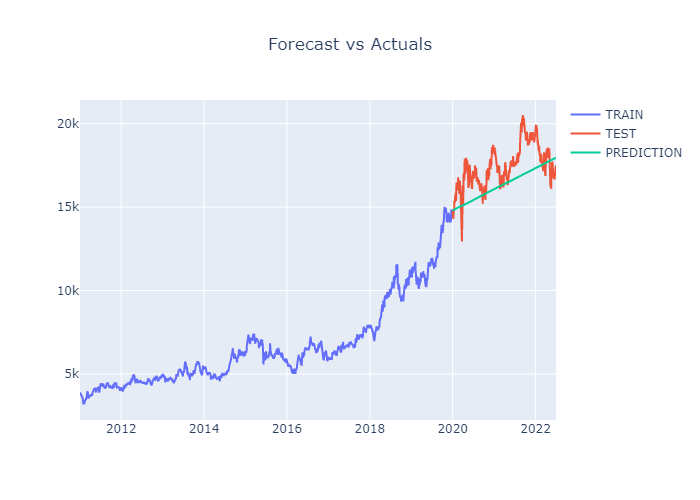

In [72]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=train_data.index, y=train_data['close'], mode='lines', name='TRAIN'))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['close'], mode='lines', name='TEST'))
fig.add_trace(go.Scatter(x=test_predictions.index, y=test_predictions, mode='lines', name='PREDICTION'))

fig.update_layout(title_text='Forecast vs Actuals', title_x=0.5)
fig.show()

In [73]:
auto_arima_mse,auto_arima_rmse = error(test_data,test_predictions)

Errors :-
MSE :  2093679.240705771
RMSE :  1446.9551619541537 



## SARIMA Model Using "auto_arima"

In [74]:
SARIMA_model = pm.auto_arima(train_data, start_p=0, start_q=1,
                             test='adf', 
                             max_p=3, max_q=3, 
                             m=5,
                             start_P=1, start_Q=2,
                             seasonal=True, #set to seasonal
                             d=1, 
                             D=1, #order of the seasonal differencing
                             trace=True,
                             error_action='ignore',  
                             suppress_warnings=True, 
                             stepwise=True,
                             n_jobs=-1)

SARIMA_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,1)(1,1,2)[5]             : AIC=inf, Time=3.11 sec
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=28380.430, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=27776.771, Time=0.33 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=0.51 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=28382.146, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=27539.965, Time=0.61 sec
 ARIMA(1,1,0)(2,1,1)[5]             : AIC=inf, Time=1.63 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=0.89 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=27539.332, Time=0.19 sec
 ARIMA(0,1,0)(1,1,0)[5]             : AIC=27775.842, Time=0.14 sec
 ARIMA(0,1,0)(2,1,1)[5]             : AIC=inf, Time=1.03 sec
 ARIMA(0,1,0)(1,1,1)[5]             : AIC=inf, Time=0.69 sec
 ARIMA(0,1,1)(2,1,0)[5]             : AIC=27539.969, Time=0.57 sec
 ARIMA(1,1,1)(2,1,0)[5]             : AIC=inf, Time=2.30 sec
 ARIMA(0,1,0)(2,1,0)[5] intercept   : AIC=27541.306, Time=1.0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 2226
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 5)   Log Likelihood              -13766.666
Date:                           Mon, 25 Jul 2022   AIC                          27539.332
Time:                                   17:25:57   BIC                          27556.448
Sample:                                        0   HQIC                         27545.584
                                          - 2226                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L5       -0.6453      0.013    -48.253      0.000      -0.672      -0.619
ar.S.L10      -0.3197      0.015    -21.175      0.000      -0.349      -0.290
sigma2      1.429e+04    250.181     57.116      0.000    1.38e+04    1.48e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.36   Jarque-Bera (JB):              1477.28
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               4.51   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
# Forecast
fc,conf = smodel.predict(623, return_conf_int=True)
test_predictions = pd.Series(fc, index=test_data.index)
test_predictions

Date
2020-01-01    14792.526080
2020-01-02    14797.615349
2020-01-03    14802.704617
2020-01-06    14807.793885
2020-01-07    14812.883154
                  ...     
2022-06-24    17937.693927
2022-06-27    17942.783195
2022-06-28    17947.872464
2022-06-29    17952.961732
2022-06-30    17958.051001
Length: 623, dtype: float64

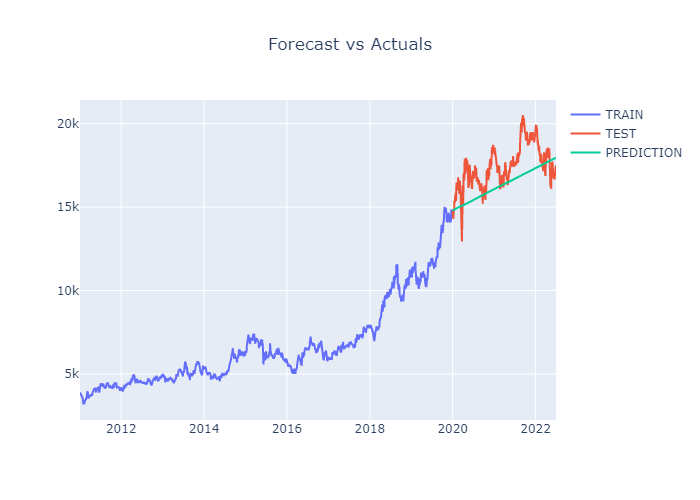

In [76]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=train_data.index, y=train_data['close'], mode='lines', name='TRAIN'))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['close'], mode='lines', name='TEST'))
fig.add_trace(go.Scatter(x=test_predictions.index, y=test_predictions, mode='lines', name='PREDICTION'))

fig.update_layout(title_text='Forecast vs Actuals', title_x=0.5)
fig.show()

In [77]:
auto_sarima_mse, auto_sarima_rmse = error(test_data,test_predictions)

Errors :-
MSE :  2093679.240705771
RMSE :  1446.9551619541537 



## SARIMA Model Using "SARIMAX"

In [78]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from tqdm import tqdm_notebook

In [79]:
def optimize_SARIMAX(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1,
                                                                                                                maxitr=200)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [80]:
p = range(0, 3, 1)
d = 1
q = range(0, 3, 1)
P = range(0, 3, 1)
D = 1
Q = range(0, 3, 1)
s = 5
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

81


In [81]:
result_df = optimize_SARIMAX(parameters_list, 1, 1, 5, train_data)
result_df

  0%|          | 0/81 [00:00<?, ?it/s]

,"(p,q)x(P,Q)",AIC
0,"(0, 0, 0, 1)",26940.640918
1,"(0, 0, 1, 1)",26940.866380
2,"(0, 0, 0, 2)",26940.871782
3,"(0, 1, 0, 1)",26941.740293
4,"(1, 0, 0, 1)",26941.761146
...,...,...
76,"(0, 1, 0, 0)",28382.139403
77,"(1, 0, 0, 0)",28382.145649
78,"(0, 2, 0, 0)",28383.517088
79,"(2, 0, 0, 0)",28383.557407


In [82]:
best_model = SARIMAX(train_data, order=(1, 1, 0), seasonal_order=(0, 1, 1, 5)).fit(dis=-1, maxitr = 200)
print(best_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               close   No. Observations:                 2226
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 5)   Log Likelihood              -13467.881
Date:                             Mon, 25 Jul 2022   AIC                          26941.761
Time:                                     17:28:36   BIC                          26958.877
Sample:                                          0   HQIC                         26948.013
                                            - 2226                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0309      0.014     -2.206      0.027      -0.058      -0.003
ma.S.L5       -0.9989      

In [83]:
test_predictions = best_model.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)
test_predictions.index = test_data.index
test_predictions

Date
2020-01-01    14792.707195
2020-01-02    14789.033755
2020-01-03    14797.577667
2020-01-06    14806.507965
2020-01-07    14813.054496
                  ...     
2022-06-24    17945.011944
2022-06-27    17951.558472
2022-06-28    17956.659937
2022-06-29    17953.056108
2022-06-30    17961.597872
Name: predicted_mean, Length: 623, dtype: float64

In [84]:
sarima_mse, sarima_rmse = error(test_data,test_predictions)

Errors :-
MSE :  2091520.7190178423
RMSE :  1446.2090855121337 



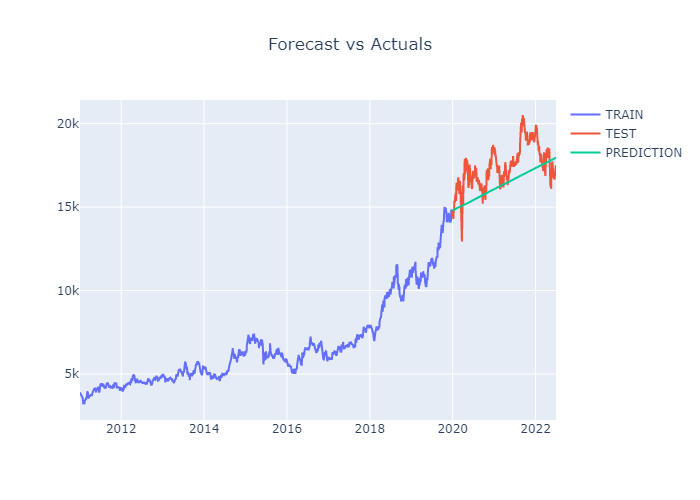

In [85]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=train_data.index, y=train_data['close'], mode='lines', name='TRAIN'))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['close'], mode='lines', name='TEST'))
fig.add_trace(go.Scatter(x=test_predictions.index, y=test_predictions, mode='lines', name='PREDICTION'))

fig.update_layout(title_text='Forecast vs Actuals', title_x=0.5)
fig.show()

In [86]:
expo_mse, expo_rmse

(3243185.3876411137, 1800.8846125282746)

In [87]:
auto_arima_mse, auto_arima_rmse, arima_mse, arima_rmse

(2093679.240705771, 1446.9551619541537, 2198312.113229962, 1482.6706017285032)

In [88]:
auto_sarima_mse, auto_sarima_rmse, sarima_mse, sarima_rmse

(2093679.240705771, 1446.9551619541537, 2091520.7190178423, 1446.2090855121337)

In [89]:
index = ['expo', 'arima', 'auto_arima', 'sarima', 'auto_sarima']
er = {'mse':[expo_mse, arima_mse, auto_arima_mse, sarima_mse, auto_sarima_mse], 
      'rmse':[expo_rmse, arima_rmse, auto_arima_rmse, sarima_rmse, auto_sarima_rmse]}
df_errors = pd.DataFrame(er, index = index)
df_errors

,mse,rmse
expo,3.243185e+06,1800.884613
arima,2.198312e+06,1482.670602
auto_arima,2.093679e+06,1446.955162
sarima,2.091521e+06,1446.209086
auto_sarima,2.093679e+06,1446.955162
